In [71]:
import numpy as np

def parse_off(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    assert lines[0].strip() == 'OFF', "Not a valid OFF file"

    header = lines[1].strip().split()
    num_vertices = int(header[0])
    num_faces = int(header[1])
    
    vertices = []
    for i in range(2, 2 + num_vertices):
        vertex = list(map(float, lines[i].strip().split()))
        vertices.append(vertex)
    
    faces = []
    for i in range(2 + num_vertices, 2 + num_vertices + num_faces):
        face = list(map(int, lines[i].strip().split()[1:])) # Ignoring the first number (number of vertices in the face)
        faces.append(face)
    
    return vertices, faces

def normalize_vertices(vertices, target_dim):
    vertices = np.array(vertices)
    min_coords = np.min(vertices, axis=0)
    max_coords = np.max(vertices, axis=0)
    
    # Translate vertices to start from (0,0,0)
    vertices -= min_coords
    
    # Scale vertices to fit within the target dimensions
    scale = target_dim / np.max(max_coords - min_coords)
    vertices *= scale
    
    return vertices

def rasterize_mesh(vertices, faces, matrix_dim):
    vertices = normalize_vertices(vertices, matrix_dim)
    
    # Ensuring the matrix dimensions
    matrix = np.zeros((matrix_dim, matrix_dim, matrix_dim), dtype=np.uint8)
    
    for face in faces:
        # For simplicity, we just mark the vertices as 1
        for vertex_idx in face:
            x, y, z = np.round(vertices[vertex_idx]).astype(int)
            x = np.clip(x, 0, matrix_dim - 1)
            y = np.clip(y, 0, matrix_dim - 1)
            z = np.clip(z, 0, matrix_dim - 1)
            matrix[x, y, z] = 1
    
    return matrix

# Example usage:
file_path = 'Test Set/3D files/bathtub_0156.off'
vertices, faces = parse_off(file_path)
matrix_dim = 256 # Fixed dimension for all matrices
tub_matrix = rasterize_mesh(vertices, faces, matrix_dim)
file_path = 'Test Set/3D files/toilet_0443.off'
vertices, faces = parse_off(file_path)
matrix_dim = 256 # Fixed dimension for all matrices
toilet_matrix = rasterize_mesh(vertices, faces, matrix_dim)


# Now matrix contains the 3D representation with standardized dimensions


In [72]:
tub_matrix.shape
toilet_matrix.shape

(256, 256, 256)

In [73]:
file_path = 'Test Set/3D files/bathtub_0156.off'
file_path = 'Test Set/3D files/toilet_0443.off'

In [80]:
import trimesh
from pythreejs import *
from IPython.display import display
import numpy as np

# Load the .off file
mesh = trimesh.load('Test Set/3D files/bathtub_0149.off')

# Convert vertices and faces to the correct format
vertices = np.array(mesh.vertices, dtype=np.float32)
faces = np.array(mesh.faces, dtype=np.uint32).ravel()

# Create BufferGeometry
geometry = BufferGeometry(
    attributes={
        'position': BufferAttribute(vertices, normalized=False),
        'index': BufferAttribute(faces, normalized=False)
    }
)

material = MeshBasicMaterial(color='red', wireframe=True)
three_mesh = Mesh(geometry, material)

# Set up the scene and renderer
camera = PerspectiveCamera(position=[5, 5, 5], up=[0, 0, 1], aspect=1, fov=60)
camera.lookAt([0, 0, 0])

scene = Scene(children=[three_mesh, AmbientLight(color='#cccccc')])
renderer = Renderer(camera=camera, scene=scene, controls=[OrbitControls(controlling=camera)],
                    width=800, height=600)

# Display the rendered object
display(renderer)


Renderer(camera=PerspectiveCamera(fov=60.0, position=(5.0, 5.0, 5.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.…

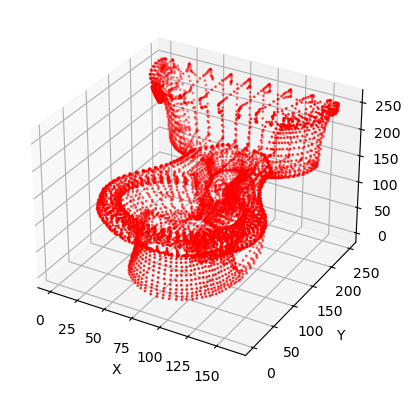

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Get the coordinates of non-zero voxels
    x, y, z = np.nonzero(matrix)
    
    # Scatter plot of non-zero voxels
    ax.scatter(x, y, z, zdir='z', c='red', s=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()


# Visualize the matrix
visualize_matrix(toilet_matrix)


In [77]:
def project_to_xy(matrix):
    # Sum along the Z-axis to get the 2D projection
    projection = np.max(matrix, axis=2)
    return projection

def visualize_projection(projection):
    # Get the coordinates of non-zero pixels
    y,x = np.nonzero(projection)
    # Create a scatter plot with blue dots and white background
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=1)
    plt.gca().set_facecolor('white')
    plt.gca().invert_yaxis()
    plt.title('Binary 2D Projection onto XY Plane')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.show()
tub_projection = project_to_xy(tub_matrix)
toilet_projection = project_to_xy(toilet_matrix)


(256, 256)


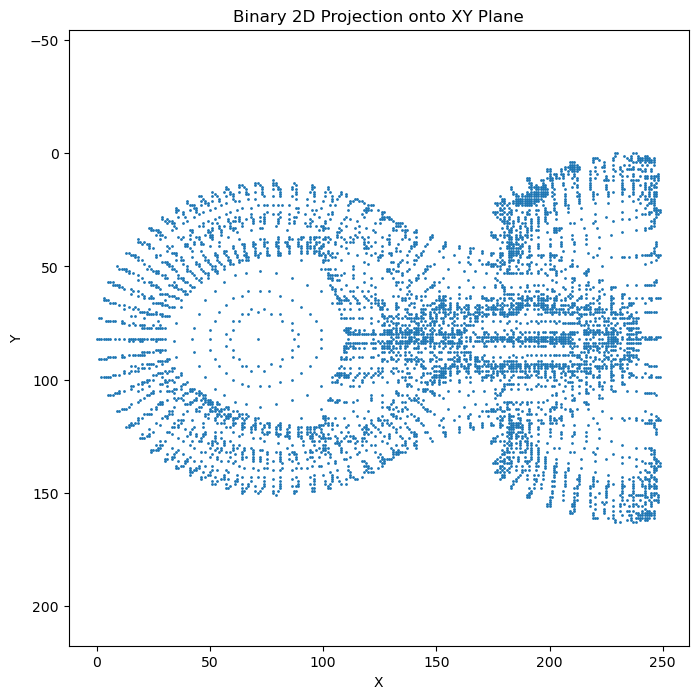

In [78]:
print(toilet_projection.shape)
visualize_projection(toilet_projection)

In [38]:
tub_projection[:50][:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [64]:
import pickle
def process_off_files(folder_path, matrix_dim):
    files = [f for f in os.listdir(folder_path) if f.endswith('.off')]
    dataset = []

    for file in files:
        file_path = os.path.join(folder_path, file)
        vertices, faces = parse_off(file_path)
        matrix = rasterize_mesh(vertices, faces, matrix_dim)
        projection = project_to_xy(matrix)
        
        dataset.append((matrix, projection))
    
    return dataset

def save_dataset(dataset, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(dataset, f)

folder_path = '3D files'
matrix_dim = 256
dataset = process_off_files(folder_path,matrix_dim)
save_dataset(dataset, 'dataset.pkl')

In [68]:
print(dataset[0][0].shape)
print(type(dataset))
print(len(dataset))
print(dataset[0][1].shape)


(256, 256, 256)
<class 'list'>
218
(256, 256)
